# Supervised Learning II
`jskyzero` `2018/04/22`

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

## 模型的性能度量

 

我们需要比较两个分类模型$M_1$和$M_2$。他们在10个二类（+或-）样本所组成的测试集上的分类结果如下表格中所示。假设我们更关心正样本是否能被正确检测。

 

| Instance | True Class | Scores  from $M_1$                       | Scores  from $M_2$                       |
| -------- | ---------- | ---------------------------------------- | ---------------------------------------- |
| 1        | +          | 0.73                                     | 0.61                                     |
| 2        | +          | 0.69                                     | 0.03                                     |
| 3        | -          | 0.44                                     | 0.68                                     |
| 4        | -          | 0.55                                     | 0.31                                     |
| 5        | -          | 0.67                                     | 0.45                                     |
| 6        | +          | 0.47                                     | 0.09                                     |
| 7        | -          | 0.08                                     | 0.38                                     |
| 8        | -          | 0.15                                     | 0.05                                     |
| 9        | +          | 0.45                                     | 0.01                                     |
| 10       | -          | 0.35                                     | 0.04                                     |


In [2]:
# read data
data_str = '''
| 1        | +          | 0.73                                     | 0.61                                     |
| 2        | +          | 0.69                                     | 0.03                                     |
| 3        | -          | 0.44                                     | 0.68                                     |
| 4        | -          | 0.55                                     | 0.31                                     |
| 5        | -          | 0.67                                     | 0.45                                     |
| 6        | +          | 0.47                                     | 0.09                                     |
| 7        | -          | 0.08                                     | 0.38                                     |
| 8        | -          | 0.15                                     | 0.05                                     |
| 9        | +          | 0.45                                     | 0.01                                     |
| 10       | -          | 0.35                                     | 0.04                                     |
'''
data_str = map(lambda str : str.strip(' '), data_str.replace('\n', '').split('|'))
data = np.delete(np.array(list(data_str))[0:-1].reshape(10, 5), 0, 1)
M1 = data[:,0:3]
M2 = np.hstack((data[:, 0:2], data[:, 3:4]))

# caluate data
def calcuate_data(true_class, scores, threshold, true_label):
    result = {'TP':0, 'FP':0, 'FN':0, 'TN':0}
    for i in range(0, len(scores), 1):
        predict_class = 'P' if float(scores[i]) > threshold else 'N'
        predict_right = 'T' if ((predict_class == 'P' and true_class[i] == true_label) or
                                (predict_class == 'N' and not true_class[i] == true_label)) else 'F'
        result[predict_right + predict_class] = result[predict_right + predict_class] + 1
    return result

def calcuate_result(data, threshold, true_label='+'):
    try:
        data = calcuate_data(data[:, 0], data[:, 1], threshold, true_label)
        accuracy = (data['TP'] + data['TN']) / (data['TP'] + data['FP'] + data['FN'] + data['TN'] )
        precision = data['TP'] / (data['TP'] + data['FP'])
        recall = data['TP'] / (data['TP'] + data['FN'])
        FPR = data['FP'] / (data['FP'] + data['TN'])
        F_measure = (2 * recall * precision) / (recall + precision)
        result = [accuracy, precision, recall,  FPR, F_measure]
        return result
    except ZeroDivisionError:
        return [0] * 5

def print_result(result):
    print("accuracy = {0:.2f}\nprecision = {1:.2f}\nrecall(TPR) = {2:.2f}\nFPR = {3:.2f}\nF_measure = {4:.2f}".format(*result))

（1）对于分类模型$M_1$，取阈值为0.5，分别计算分类准确率（accuracy）、查准率（precision）、查全率（recall，又称真正例率，true positive rate，TPR）、假正例率（false positive rate，FPR）和F-measure；

In [3]:
print_result(calcuate_result(M1[:, 1:3], 0.5))

accuracy = 0.60
precision = 0.50
recall(TPR) = 0.50
FPR = 0.33
F_measure = 0.50


（2）对于分类模型$M_2$，取阈值为0.5，分别计算分类准确率（accuracy）、查准率（precision）、查全率（recall，又称真正例率，true positive rate，TPR）、假正例率（false positive rate，FPR）和F-measure；并与分类模型$M_1$比较，分析哪个分类模型在这个测试集上表现更好；

In [4]:
print_result(calcuate_result(M2[:, 1:3], 0.5))

accuracy = 0.60
precision = 0.50
recall(TPR) = 0.25
FPR = 0.17
F_measure = 0.33


从数值上比较，取阈值为0.5时候，**$M2$的表现更好**。

（3）对于分类模型$M_1$，取阈值为0.2，分别计算分类准确率（accuracy）、查准率（precision）、查全率（recall，又称真正例率，true positive rate，TPR）、假正例率（false positive rate，FPR）和F-measure；并讨论当阈值为0.2或0.5时，哪个分类模型$M_1$的分类结果哪个更好；

In [5]:
print_result(calcuate_result(M1[:, 1:3], 0.2))

accuracy = 0.60
precision = 0.50
recall(TPR) = 1.00
FPR = 0.67
F_measure = 0.67


同样，从数值上比较，取阈值为0.2时候，**$M1$的表现更好**。

（4）试讨论是否存在更好的阈值；若存在，请求出最优阈值并说明原因。

依照题意，我们更加关心的是**正样本是否能被正确检测**，即查准率。

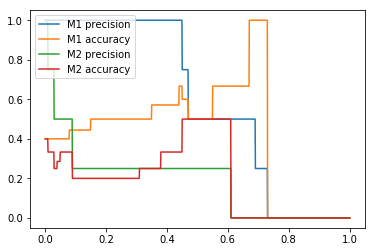

In [6]:
x = np.linspace(0, 1, 1000)[1:]
y1 = np.vectorize(lambda threshold: calcuate_result(M1[:, 1:3], threshold)[2])(x)
y11 = np.vectorize(lambda threshold: calcuate_result(M1[:, 1:3], threshold)[1])(x)
y2 = np.vectorize(lambda threshold: calcuate_result(M2[:, 1:3], threshold)[2])(x)
y21 = np.vectorize(lambda threshold: calcuate_result(M2[:, 1:3], threshold)[1])(x)
plt.plot(x, y1, label="M1 precision")
plt.plot(x, y11, label="M1 accuracy")
plt.plot(x, y2, label="M2 precision")
plt.plot(x, y21, label="M2 accuracy")
plt.legend(loc="upper left")

如图所示，选取在查准率最高的时候其他数据同时也较高的即可。举例来说，对M1可以取阈值0.4, M2可以取阈值0.1.

## 神经网络
考虑以下的二类训练样本集

 

| Instance | Feature vector $x$ | Output label $y$ |
| -------- | ---------------------------------------- | ---------------------------------------- |
| 1        | (0, 0)                                   | +                                        |
| 2        | (1, 0)                                   | +                                        |
| 3        | (0, 1)                                   | -                                        |
| 4        | (-1, 0)                                  | -                                        |
| 5        | (1, -1)                                  | -                                        |

 

对此训练样本集，我们需要训练一个三层神经网络（输入层、单隐层、输出层），其中单隐层的单元（神经元）数目设为2，激活函数（activation function）为Sigmoid函数： 

In [7]:
data = [[0, 0],
        [1, 0],
        [0, 1],
        [-1, 0],
        [1, -1]]
data = np.array(data)

（1）在二维坐标系中画出这5个训练样本点，并讨论此训练样本集是否线性可分；

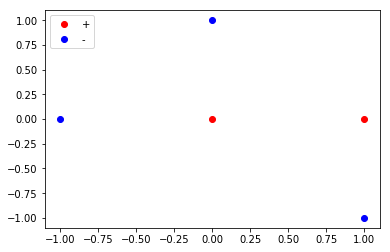

In [8]:
plt.plot(data[0:2, 0], data[0:2, 1], 'ro', color='r', label="+")
plt.plot(data[2:5, 0], data[2:5, 1], 'ro', color='b', label="-")
plt.legend(loc="upper left")

显然，线性不可分。

（2）试分析将Sigmoid激活函数换成线性函数的缺陷；

当Sigmoid激活函数换成线性函数后，最终组合得到的还是一个线性函数，而目标线性不可分，因而仍然无法得到合理的划分。

（3）令初始化参数全部为0，试运用前馈（feedforward）算法计算在初始化参数下此三层神经网络的输出；然后运用反向传播（backpropagation）算法，计算代价函数对所有参数的偏导数，并讨论将初始化参数全部设为0所带来的问题；

将初始化参数全部设为0所带来的问题: 将会导致更新没有产生变化，因而学习不到所需的参数，导致最终结果较差。

（4）试给出一个神经网络（画出架构图，并写出激活函数及其对应的参数），使此训练样本集的5个训练样本点都可以被正确分类。

In [9]:
from sklearn.neural_network import MLPClassifier
X = data
Y = ['1'] * 2 + ['0'] * 3
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X, Y)
clf.score(X, Y)

1.0

## 决策树

考虑以下的二类训练样本集

 

| Instance | A    | B    | Class Label |
| -------- | ---- | ---- | ----------- |
| 1        | T    | F    | +           |
| 2        | T    | T    | +           |
| 3        | T    | T    | +           |
| 4        | T    | F    | -           |
| 5        | T    | T    | +           |
| 6        | F    | F    | -           |
| 7        | F    | F    | -           |
| 8        | F    | F    | -           |
| 9        | T    | T    | -           |
| 10       | T    | F    | -           |

In [10]:
data_str = '''
| 1        | T    | F    | +           |
| 2        | T    | T    | +           |
| 3        | T    | T    | +           |
| 4        | T    | F    | -           |
| 5        | T    | T    | +           |
| 6        | F    | F    | -           |
| 7        | F    | F    | -           |
| 8        | F    | F    | -           |
| 9        | T    | T    | -           |
| 10       | T    | F    | -           |
'''
data_str = map(lambda str : str.strip(' '), data_str.replace('\n', '').split('|'))
data = np.array(list(data_str))[0:-1].reshape(10, 5)[:, 2:5]

# caluate data
def calcuate_data(true_false, positive_negative, true_label='T', positive_label='+'):
    result = {'TP':0, 'TN':0, 'FP':0, 'FN':0}
    for i in range(0, min(len(true_false), len(positive_negative)), 1):
        TF = 'T' if true_false[i] == true_label else 'F'
        PN = 'P' if positive_negative[i] == positive_label else 'N'
        result[TF + PN] = result[TF + PN] + 1
    return result

A = calcuate_data(data[:, 0], data[:, 2])
B = calcuate_data(data[:, 1], data[:, 2])
print(A)
print(B)

{'TP': 4, 'TN': 3, 'FP': 0, 'FN': 3}
{'TP': 3, 'TN': 1, 'FP': 1, 'FN': 5}


（1）计算以属性A或B为划分的信息熵（Entropy）增益，并说明决策树学习算法选择哪个属性进行划分；

In [11]:
entropy = lambda x : - x * math.log(x) if x > 0 else 0
Entropy_T = lambda x : entropy(x['TN'] / (x['TN'] + x['TP'])) + entropy(x['TP'] / (x['TN'] + x['TP']))
Entropy_F = lambda x : entropy(x['FN'] / (x['FN'] + x['FP'])) + entropy(x['FP'] / (x['FN'] + x['FP']))
Entropy = lambda x : Entropy_T(x) + Entropy_F(x)
print("Entropy(A) = {0:2f}".format(Entropy(A)))
print("Entropy(B) = {0:2f}".format(Entropy(B)))
print("Select {0}".format( "A" if Entropy(A) < Entropy(B) else "B"))

Entropy(A) = 0.682908
Entropy(B) = 1.012896
Select A


（2）计算以属性A或B为划分的Gini增益，并说明决策树学习算法选择哪个属性进行划分；

In [12]:
Entropy_Root = lambda x : entropy((x['FN'] + x['TN']) / (x['FN'] + x['FP'] + x['TN'] + x['TP'])) + \
                          entropy((x['FP'] + x['TP']) / (x['FN'] + x['FP'] + x['TN'] + x['TP']))
Entropy_Root(A)
# Entropy_Root(B)
Gini = lambda x : Entropy_Root(A) - ((x['TN'] + x['TP']) / (x['FN'] + x['FP'] + x['TN'] + x['TP']) * Entropy_T(x) + \
                                     (x['FN'] + x['FP']) / (x['FN'] + x['FP'] + x['TN'] + x['TP']) * Entropy_F(x))
print("Gini(A) = {0:2f}".format(Gini(A)))
print("Gini(B) = {0:2f}".format(Gini(B)))
print("Select {0}".format( "A" if Gini(A) > Gini(B) else "B"))

Gini(A) = 0.194976
Gini(B) = 0.177741
Select A


（3）计算以属性A或B为划分的分类误差（ClassificationError）增益，并说明决策树学习算法选择哪个属性进行划分；

In [13]:
Error_T = lambda x : 1 - max(x['TN'] / (x['TN'] + x['TP']), x['TP'] / (x['TN'] + x['TP']))
Error_F = lambda x : 1 - max(x['FN'] / (x['FN'] + x['FP']), x['FP'] / (x['FN'] + x['FP']))
Error = lambda x : (x['TN'] + x['TP']) / (x['FN'] + x['FP'] + x['TN'] + x['TP']) * Error_T(x) + \
                   (x['FN'] + x['FP']) / (x['FN'] + x['FP'] + x['TN'] + x['TP']) * Error_F(x)
print("Error(A) = {0:2f}".format(Error(A)))
print("Error(B) = {0:2f}".format(Error(B)))
print("Select {0}".format( "A" if Error(A) < Error(B) else "B"))

Error(A) = 0.300000
Error(B) = 0.200000
Select B


（4）说明信息熵增益、Gini增益和分类误差增益对属性选择有不一样的偏好。

如上所示，信息熵增益、Gini增益和分类误差增益不仅计算出的数值不一样，判断好坏的方式也不一样，所以他们对属性选择有不一样的偏好。